In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math 
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')
from aquarel import load_theme
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from scipy.stats import normaltest
from sklearn.metrics import PredictionErrorDisplay

In [2]:
data= pd.read_csv("bodyfat.csv")
data

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9  

[252 rows x 15 columns]

# Preprocessing

In [3]:
data.shape

(252, 15)

In [4]:
data.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [5]:
data.tail()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [9]:
data.describe()

Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.783077    7.164058    5.249952    2.411805    1.694893   
min     79.300000   69.400000   85.000000   47.200000   33.000000   19.100000   
25%     94.350000   84.575000   95.500000   56.000000   36.975000   22.000000   
50%     99.650000   90.950000   99.300000   59.000000   38.500000   22.800000   
75%    105.375000   99.325000  103.525000   62.350000   39.925000   24.000000   
max    136.200000  148.100000  147.700000   87.300000   49.100000   33.900000   

           Biceps     Forearm       Wrist  
count  252.000000  252.000000  252.000000  
mean    32.273413   28.663889   18.229762  
std      3.021274    2.020691    0.933585  
min     24.800000   21.000000   15.800000  
25%     30.200000   27.300000   17.600000  
50%     32.050000   28.700000   18.300000  
75%     34.325000   30.000000   18.800000  
max     45.000000   34.900000   21.400000

In [10]:
data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [11]:
#Displaying the number of unique values in each column
for col in data.columns:
  print(f'The unique values in {col} = {len(data[col].unique())}')

The unique values in Density = 218
The unique values in BodyFat = 176
The unique values in Age = 51
The unique values in Weight = 197
The unique values in Height = 48
The unique values in Neck = 90
The unique values in Chest = 174
The unique values in Abdomen = 185
The unique values in Hip = 152
The unique values in Thigh = 139
The unique values in Knee = 90
The unique values in Ankle = 61
The unique values in Biceps = 104
The unique values in Forearm = 77
The unique values in Wrist = 44


In [12]:
data = data[ (data.Density>0)& (data.BodyFat>=0)& (data.Age>=0)& (data.Weight>= 0) & (data.Height>= 0)& (data.Neck>= 0)&(data.Chest>= 0) & (data.Abdomen>= 0)& 
(data.Hip>= 0)&(data.Thigh>= 0) & (data.Knee>= 0)& (data.Ankle>= 0)&(data.Biceps>= 0) & (data.Forearm>= 0)& (data.Wrist>= 0)]
data

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9  

[252 rows x 15 columns]

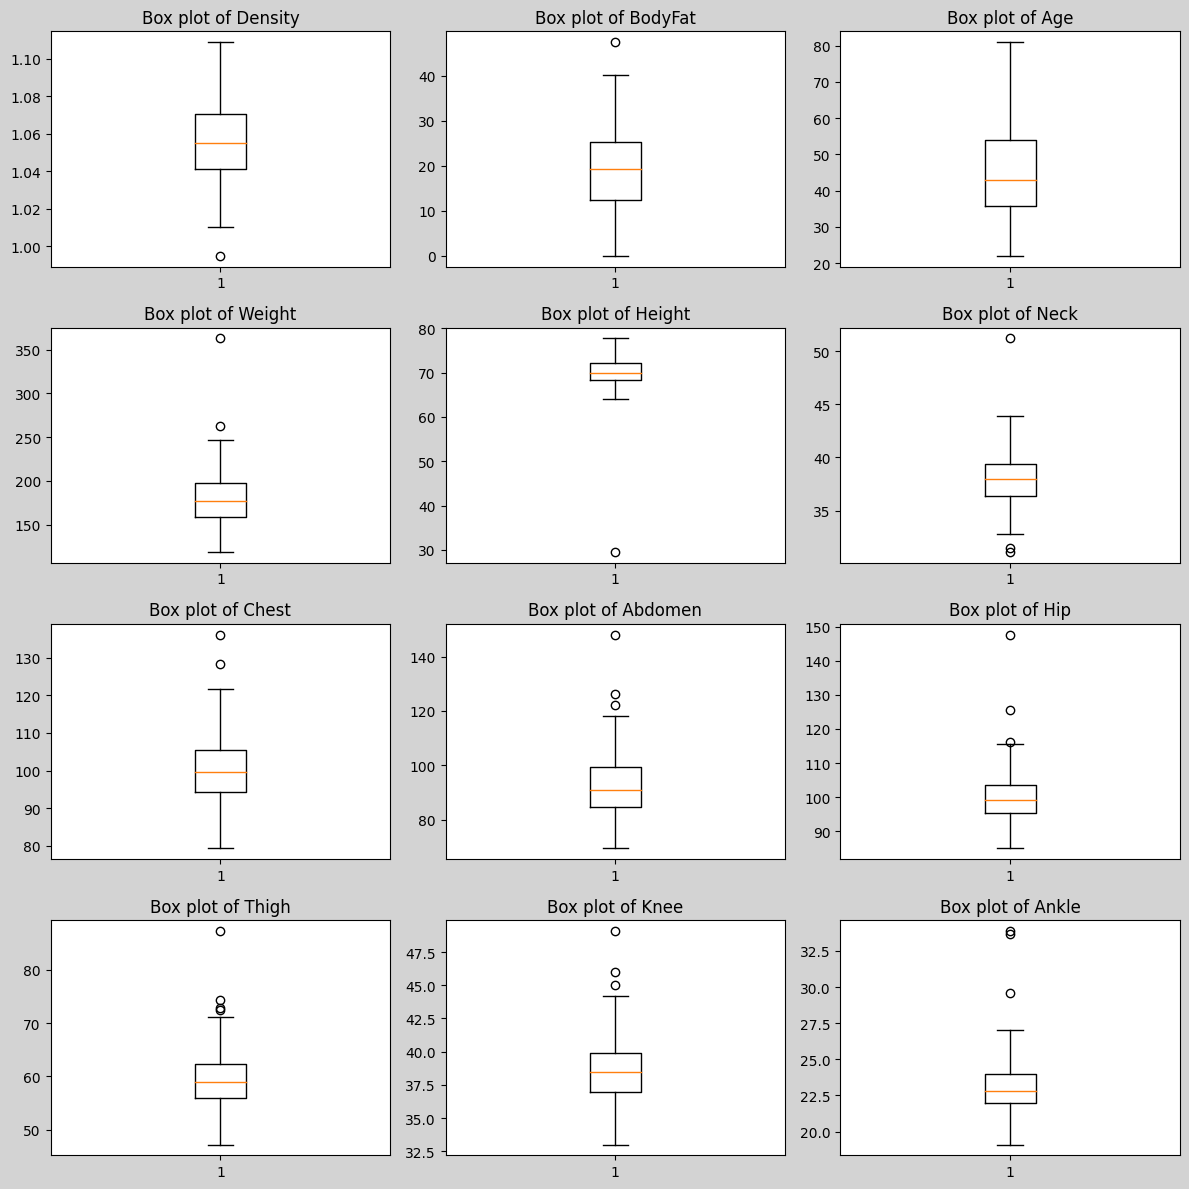

In [13]:
#check data as in boxplots to see if there is outliers
fig, axs = plt.subplots(4, 3, figsize=(12, 12))
fig.set_facecolor('lightgrey')

axs[0, 0].boxplot(data['Density'])
axs[0, 0].set_title('Box plot of Density')

axs[0, 1].boxplot(data['BodyFat'])
axs[0, 1].set_title('Box plot of BodyFat')

axs[0, 2].boxplot(data['Age'])
axs[0, 2].set_title('Box plot of Age')

axs[1, 0].boxplot(data['Weight'])
axs[1, 0].set_title('Box plot of Weight')

axs[1, 1].boxplot(data['Height'])
axs[1, 1].set_title('Box plot of Height')

axs[1, 2].boxplot(data['Neck'])
axs[1, 2].set_title('Box plot of Neck')

axs[2, 0].boxplot(data['Chest'])
axs[2, 0].set_title('Box plot of Chest')

axs[2, 1].boxplot(data['Abdomen'])
axs[2, 1].set_title('Box plot of Abdomen')

axs[2, 2].boxplot(data['Hip'])
axs[2, 2].set_title('Box plot of Hip')

axs[3, 0].boxplot(data['Thigh'])
axs[3, 0].set_title('Box plot of Thigh')

axs[3, 1].boxplot(data['Knee'])
axs[3, 1].set_title('Box plot of Knee')

axs[3, 2].boxplot(data['Ankle'])
axs[3, 2].set_title('Box plot of Ankle')

plt.tight_layout()
plt.show()

In [14]:
#the columns we want to remove the outliers from
num_cols = ['Density','BodyFat','Weight','Height','Neck','Chest','Abdomen',	'Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist']

#this part of the code is for removing outliers by using interquartiles 
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper = Q3 + 1.5 * IQR
    Lower = Q1 - 1.5 * IQR

    Upper_outliers = data[data[col] > Upper].index
    Lower_outliers = data[data[col] < Lower].index

    data.drop(Upper_outliers, inplace=True)
    data.drop(Lower_outliers, inplace=True)

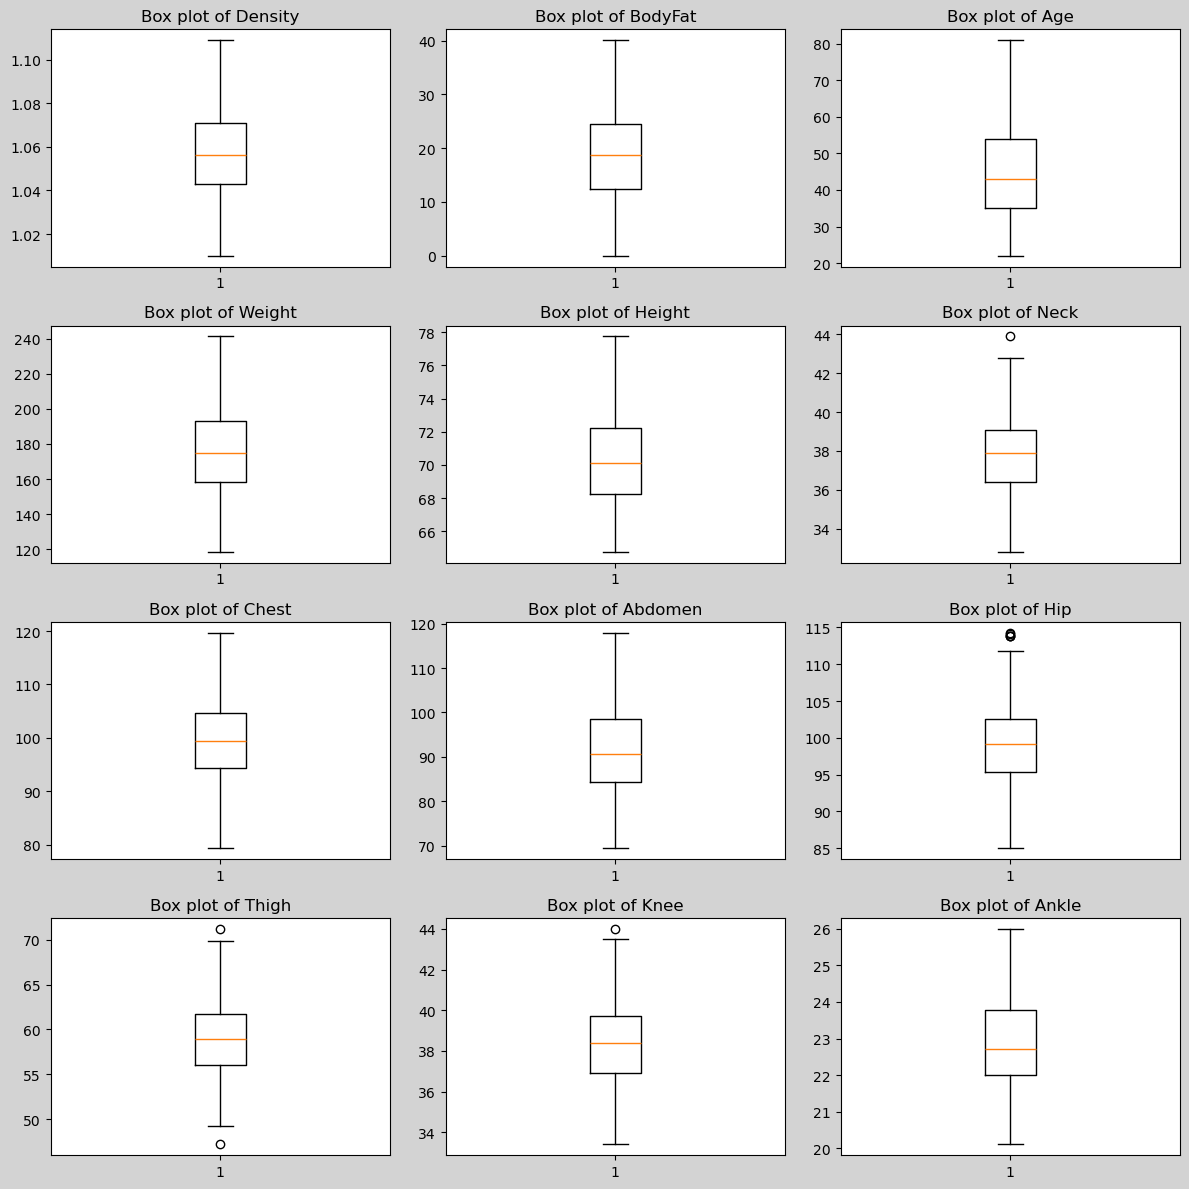

In [14]:
#display data again in boxplots after removing outliers
fig, axs = plt.subplots(4, 3, figsize=(12, 12))
fig.set_facecolor('lightgrey')

axs[0, 0].boxplot(data['Density'])
axs[0, 0].set_title('Box plot of Density')

axs[0, 1].boxplot(data['BodyFat'])
axs[0, 1].set_title('Box plot of BodyFat')

axs[0, 2].boxplot(data['Age'])
axs[0, 2].set_title('Box plot of Age')

axs[1, 0].boxplot(data['Weight'])
axs[1, 0].set_title('Box plot of Weight')

axs[1, 1].boxplot(data['Height'])
axs[1, 1].set_title('Box plot of Height')

axs[1, 2].boxplot(data['Neck'])
axs[1, 2].set_title('Box plot of Neck')

axs[2, 0].boxplot(data['Chest'])
axs[2, 0].set_title('Box plot of Chest')

axs[2, 1].boxplot(data['Abdomen'])
axs[2, 1].set_title('Box plot of Abdomen')

axs[2, 2].boxplot(data['Hip'])
axs[2, 2].set_title('Box plot of Hip')

axs[3, 0].boxplot(data['Thigh'])
axs[3, 0].set_title('Box plot of Thigh')

axs[3, 1].boxplot(data['Knee'])
axs[3, 1].set_title('Box plot of Knee')

axs[3, 2].boxplot(data['Ankle'])
axs[3, 2].set_title('Box plot of Ankle')

plt.tight_layout()
plt.show()

In [15]:
# check No of cols and rows after removing outliers
data.shape

(230, 15)

In [16]:
dependent_variable = 'BodyFat'
explanatory_variables = list(data.drop(columns = ['BodyFat']).columns)
explanatory_variables

['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist']

# Exploratory Data Analysis

## Visualizations to display the distribution of each feature

Text(0, 0.5, 'Frequency')

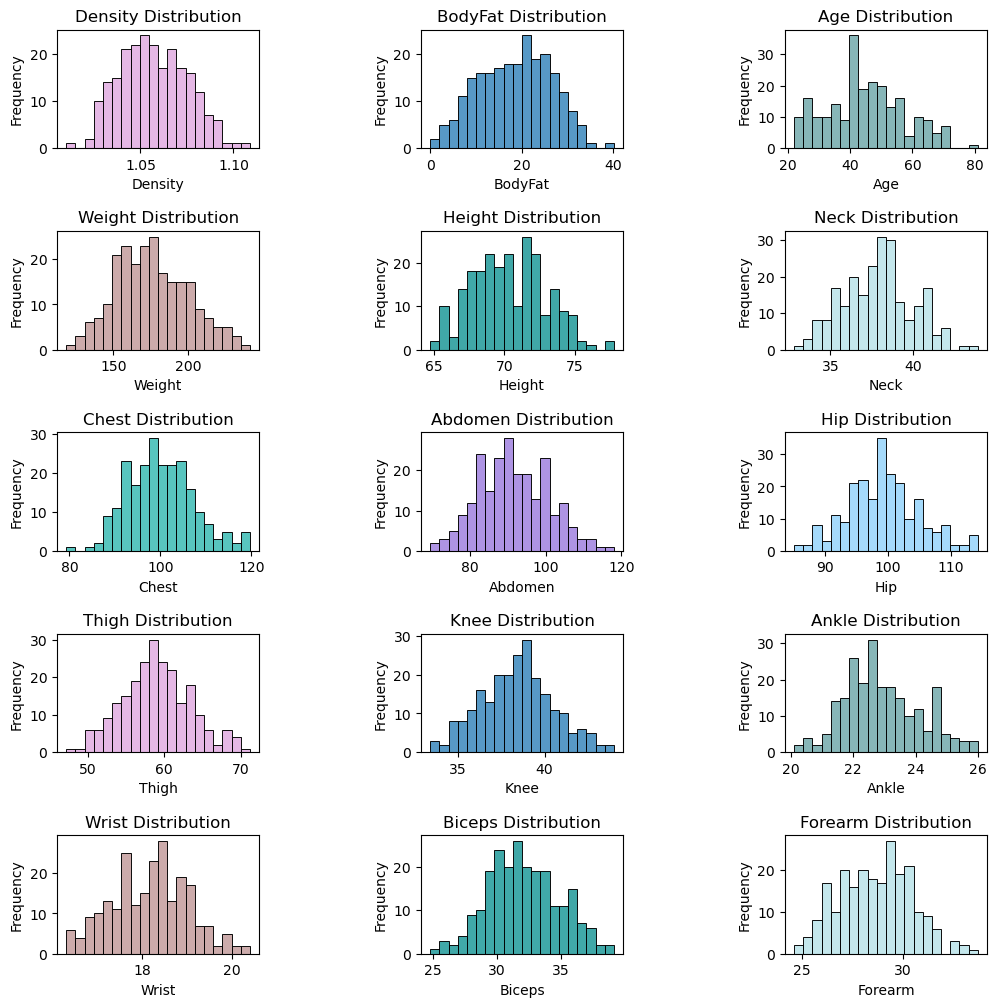

In [17]:
fig, axs = plt.subplots(5, 3, figsize=(12, 12), gridspec_kw={"hspace": 0.7, "wspace": 0.8})

sns.histplot(data["Density"].values, bins=20, ax=axs[0, 0], color='plum')
axs[0, 0].set_title("Density Distribution")
axs[0, 0].set_xlabel("Density")
axs[0,0].set_ylabel('Frequency')

sns.histplot(data["BodyFat"], bins=20,  ax=axs[0, 1])
axs[0, 1].set_title("BodyFat Distribution")
axs[0, 1].set_xlabel("BodyFat")
axs[0,1].set_ylabel('Frequency')

sns.histplot(data["Age"], bins=20,  ax=axs[0, 2],color='cadetblue')
axs[0, 2].set_title("Age Distribution")
axs[0, 2].set_xlabel("Age")
axs[0,2].set_ylabel('Frequency')

sns.histplot(data["Weight"], bins=20, ax=axs[1, 0], color='rosybrown')
axs[1, 0].set_title("Weight Distribution")
axs[1, 0].set_xlabel("Weight")
axs[1,0].set_ylabel('Frequency')

sns.histplot(data["Height"], bins=20, ax=axs[1, 1], color='darkcyan')
axs[1, 1].set_title("Height Distribution")
axs[1, 1].set_xlabel("Height")
axs[1,1].set_ylabel('Frequency')

sns.histplot(data["Neck"], bins=20,  ax=axs[1, 2], color='powderblue')
axs[1, 2].set_title("Neck Distribution")
axs[1, 2].set_xlabel("Neck")
axs[1,2].set_ylabel('Frequency')

sns.histplot(data["Chest"], bins=20, ax=axs[2, 0], color='lightseagreen')
axs[2, 0].set_title("Chest Distribution")
axs[2, 0].set_xlabel("Chest")
axs[2,0].set_ylabel('Frequency')

sns.histplot(data["Abdomen"], bins=20,  ax=axs[2, 1], color='mediumpurple')
axs[2, 1].set_title("Abdomen Distribution")
axs[2, 1].set_xlabel("Abdomen")
axs[2,1].set_ylabel('Frequency')

sns.histplot(data["Hip"],bins=20,  ax=axs[2, 2], color='lightskyblue')
axs[2, 2].set_title("Hip Distribution")
axs[2, 2].set_xlabel("Hip")
axs[2, 2].set_ylabel('Frequency')


sns.histplot(data["Thigh"],bins=20,  ax=axs[3, 0], color='plum')
axs[3, 0].set_title("Thigh Distribution")
axs[3, 0].set_xlabel("Thigh")
axs[3, 0].set_ylabel('Frequency')

sns.histplot(data["Knee"],bins=20,  ax=axs[3, 1])
axs[3, 1].set_title("Knee Distribution")
axs[3, 1].set_xlabel("Knee")
axs[3, 1].set_ylabel('Frequency')

sns.histplot(data["Ankle"],bins=20, ax=axs[3, 2],color='cadetblue')
axs[3, 2].set_title("Ankle Distribution")
axs[3, 2].set_xlabel("Ankle")
axs[3, 2].set_ylabel('Frequency')

sns.histplot(data["Wrist"],bins=20,  ax=axs[4,0], color='rosybrown')
axs[4, 0].set_title("Wrist Distribution")
axs[4, 0].set_xlabel("Wrist")
axs[4,0].set_ylabel('Frequency')

sns.histplot(data["Biceps"], bins=20, ax=axs[4, 1], color='darkcyan')
axs[4, 1].set_title("Biceps Distribution")
axs[4, 1].set_xlabel("Biceps")
axs[4, 1].set_ylabel('Frequency')

sns.histplot(data["Forearm"],bins=20, ax=axs[4,2], color='powderblue')
axs[4, 2].set_title("Forearm Distribution")
axs[4, 2].set_xlabel("Forearm")
axs[4, 2].set_ylabel('Frequency')

## Visualiztation for the relation between each feature and the dependent variable variable(bodyfat)
### Knee Distribution Vs BodyFat:

This graph shows a relatively normal distribution of knee measurements, with a peak around 40, suggesting that most individuals have knee measurements around this value, with varying body fat percentages.

### Ankle Distribution Vs BodyFat:

The ankle measurement distribution is centered around 22.5, indicating a common ankle size among the sampled individuals. The body fat percentage appears to vary widely across this common ankle size.

### Wrist Distribution Vs BodyFat:

The wrist measurement distribution peaks around 18, with body fat percentages spread across a range, indicating no strong correlation between wrist size and body fat percentage.

### Biceps Distribution Vs BodyFat:

Biceps measurements are mostly concentrated around 30, with body fat percentages varying less widely than in other distributions, suggesting a slight correlation between larger biceps and higher body fat percentages.

### Forearm Distribution Vs BodyFat:

Forearm sizes are mostly around 30, with a wide range of body fat percentages, indicating that forearm size alone may not be a strong predictor of body fat percentage.

### Density Vs BodyFat:

This graph shows a distribution of body density values mostly below 1.0, with body fat percentages decreasing as density increases, suggesting an inverse relationship between body density and body fat.

### Height Vs BodyFat:

Height varies from about 65 to 75 inches, with body fat percentage decreasing slightly as height increases, indicating taller individuals may have slightly lower body fat percentages.

### Abdomen Vs BodyFat:

Abdomen measurements show a strong positive correlation with body fat percentage, with higher abdomen measurements associated with higher body fat percentages.

### Neck Vs BodyFat:

Neck measurements are concentrated around 37-40, with a wide range of body fat percentages, suggesting a moderate correlation between larger neck sizes and higher body fat percentages.

### Hip Distribution Vs BodyFat:

Hip sizes show a peak around 100, with body fat percentages increasing with larger hip sizes, indicating a correlation between hip size and body fat percentage.

### Thigh Distribution Vs BodyFat:

Thigh sizes are mostly around 55-60, with body fat percentages generally higher among those with larger thigh measurements.

### Age Vs BodyFat:

Age distribution is fairly uniform across the sampled population, with body fat percentages slightly increasing with age.

### Weight Vs BodyFat:

Weight shows a strong positive correlation with body fat percentage, as expected, with higher weights associated with higher body fat percentages.

### Chest Vs BodyFat:

Chest measurements show a moderate increase in body fat percentage with larger chest sizes, suggesting a correlation between chest size and body fat percentage.

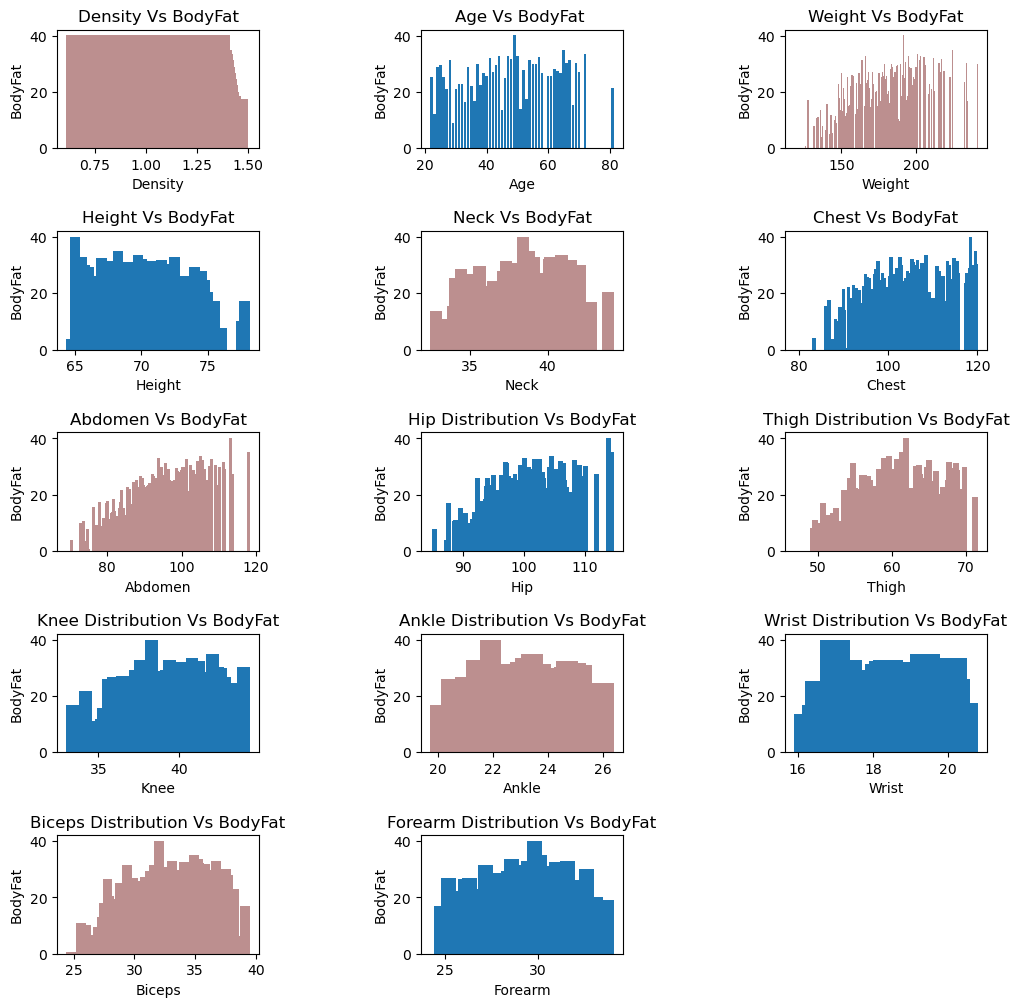

In [18]:
fig, axs = plt.subplots(5, 3, figsize=(12, 12), gridspec_kw={"hspace": 0.7, "wspace": 0.8})
axs[0, 0].bar(data["Density"],data['BodyFat'],color='rosybrown')
axs[0, 0].set_title("Density Vs BodyFat")
axs[0, 0].set_xlabel("Density")
axs[0,0].set_ylabel('BodyFat')

axs[0, 1].bar(data["Age"],data["BodyFat"])
axs[0, 1].set_title("Age Vs BodyFat ")
axs[0, 1].set_xlabel("Age")
axs[0,1].set_ylabel('BodyFat')

axs[0,2].bar(data["Weight"],data["BodyFat"],color='rosybrown')
axs[0,2].set_title("Weight Vs BodyFat")
axs[0,2].set_xlabel("Weight")
axs[0,2].set_ylabel('BodyFat')

axs[1, 0].bar(data["Height"],data["BodyFat"])
axs[1, 0].set_title("Height Vs BodyFat")
axs[1, 0].set_xlabel("Height")
axs[1,0].set_ylabel('BodyFat')

axs[1, 1].bar(data["Neck"],data["BodyFat"],color='rosybrown')
axs[1, 1].set_title("Neck Vs BodyFat")
axs[1, 1].set_xlabel("Neck")
axs[1,1].set_ylabel('BodyFat')

axs[1, 2].bar(data["Chest"],data["BodyFat"])
axs[1, 2].set_title("Chest Vs BodyFat")
axs[1, 2].set_xlabel("Chest")
axs[1, 2].set_ylabel('BodyFat')

axs[2, 0].bar(data["Abdomen"],data["BodyFat"],color='rosybrown')
axs[2, 0].set_title("Abdomen Vs BodyFat")
axs[2, 0].set_xlabel("Abdomen")
axs[2,0].set_ylabel('BodyFat')


axs[2, 1].bar(data["Hip"],data['BodyFat'])
axs[2, 1].set_title("Hip Distribution Vs BodyFat")
axs[2, 1].set_xlabel("Hip")
axs[2, 1].set_ylabel('BodyFat')

axs[2,2].bar(data["Thigh"],data['BodyFat'],color='rosybrown')
axs[2,2].set_title("Thigh Distribution Vs BodyFat")
axs[2,2].set_xlabel("Thigh")
axs[2,2].set_ylabel('BodyFat')

axs[3,0].bar(data["Knee"],data['BodyFat'])
axs[3,0].set_title("Knee Distribution Vs BodyFat")
axs[3,0].set_xlabel("Knee")
axs[3,0].set_ylabel('BodyFat')

axs[3,1].bar(data["Ankle"],data['BodyFat'],color='rosybrown')
axs[3, 1].set_title("Ankle Distribution Vs BodyFat")
axs[3, 1].set_xlabel("Ankle")
axs[3, 1].set_ylabel('BodyFat')

axs[3,2].bar(data["Wrist"],data['BodyFat'])
axs[3,2].set_title("Wrist Distribution Vs BodyFat")
axs[3,2].set_xlabel("Wrist")
axs[3,2].set_ylabel('BodyFat')

axs[4, 0].bar(data["Biceps"],data['BodyFat'],color='rosybrown')
axs[4, 0].set_title("Biceps Distribution Vs BodyFat")
axs[4, 0].set_xlabel("Biceps")
axs[4, 0].set_ylabel('BodyFat')

axs[4, 1].bar(data["Forearm"],data['BodyFat'])
axs[4, 1].set_title("Forearm Distribution Vs BodyFat")
axs[4, 1].set_xlabel("Forearm")
axs[4, 1].set_ylabel('BodyFat')
fig.delaxes(axs[4,2 ])

plt.tight_layout()
plt.show()

## Creating a correlation matrix:

In [21]:
corr_matrix=data.corr()
corr_matrix

Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.985195 -0.283117 -0.549839  0.057147 -0.417297 -0.634854   
BodyFat -0.985195  1.000000  0.298978  0.573286 -0.039915  0.438551  0.659287   
Age     -0.283117  0.298978  1.000000 -0.012681 -0.238290  0.142187  0.201057   
Weight  -0.549839  0.573286 -0.012681  1.000000  0.528017  0.777908  0.867970   
Height   0.057147 -0.039915 -0.238290  0.528017  1.000000  0.286046  0.209278   
Neck    -0.417297  0.438551  0.142187  0.777908  0.286046  1.000000  0.727889   
Chest   -0.634854  0.659287  0.201057  0.867970  0.209278  0.727889  1.000000   
Abdomen -0.785375  0.802911  0.273555  0.846462  0.173781  0.687393  0.884940   
Hip     -0.570972  0.590550 -0.060045  0.918129  0.408979  0.654914  0.784154   
Thigh   -0.508291  0.517271 -0.224636  0.820574  0.320859  0.610384  0.655620   
Knee    -0.452451  0.470350  0.010044  0.841181  0.484783  0.618606  0.680244   
Ankle   -0.225699  0.226079 -0.190624  0.679817  0.467125  0.487270  0.489372   
Biceps  -0.434217  0.441578 -0.045330  0.748616  0.280356  0.666204  0.667896   
Forearm -0.353538  0.367219 -0.075654  0.782221  0.352001  0.763418  0.680101   
Wrist   -0.245077  0.270504  0.238001  0.684528  0.384136  0.717665  0.601101   

          Abdomen       Hip     Thigh      Knee     Ankle    Biceps   Forearm  \
Density -0.785375 -0.570972 -0.508291 -0.452451 -0.225699 -0.434217 -0.353538   
BodyFat  0.802911  0.590550  0.517271  0.470350  0.226079  0.441578  0.367219   
Age      0.273555 -0.060045 -0.224636  0.010044 -0.190624 -0.045330 -0.075654   
Weight   0.846462  0.918129  0.820574  0.841181  0.679817  0.748616  0.782221   
Height   0.173781  0.408979  0.320859  0.484783  0.467125  0.280356  0.352001   
Neck     0.687393  0.654914  0.610384  0.618606  0.487270  0.666204  0.763418   
Chest    0.884940  0.784154  0.655620  0.680244  0.489372  0.667896  0.680101   
Abdomen  1.000000  0.828396  0.693114  0.703751  0.441517  0.611763  0.583775   
Hip      0.828396  1.000000  0.861841  0.822665  0.607309  0.685904  0.679812   
Thigh    0.693114  0.861841  1.000000  0.769667  0.626063  0.705517  0.683062   
Knee     0.703751  0.822665  0.769667  1.000000  0.699063  0.601021  0.647171   
Ankle    0.441517  0.607309  0.626063  0.699063  1.000000  0.474366  0.580045   
Biceps   0.611763  0.685904  0.705517  0.601021  0.474366  1.000000  0.800284   
Forearm  0.583775  0.679812  0.683062  0.647171  0.580045  0.800284  1.000000   
Wrist    0.545458  0.552050  0.472723  0.616054  0.599863  0.563496  0.690787   

            Wrist  
Density -0.245077  
BodyFat  0.270504  
Age      0.238001  
Weight   0.684528  
Height   0.384136  
Neck     0.717665  
Chest    0.601101  
Abdomen  0.545458  
Hip      0.552050  
Thigh    0.472723  
Knee     0.616054  
Ankle    0.599863  
Biceps   0.563496  
Forearm  0.690787  
Wrist    1.000000

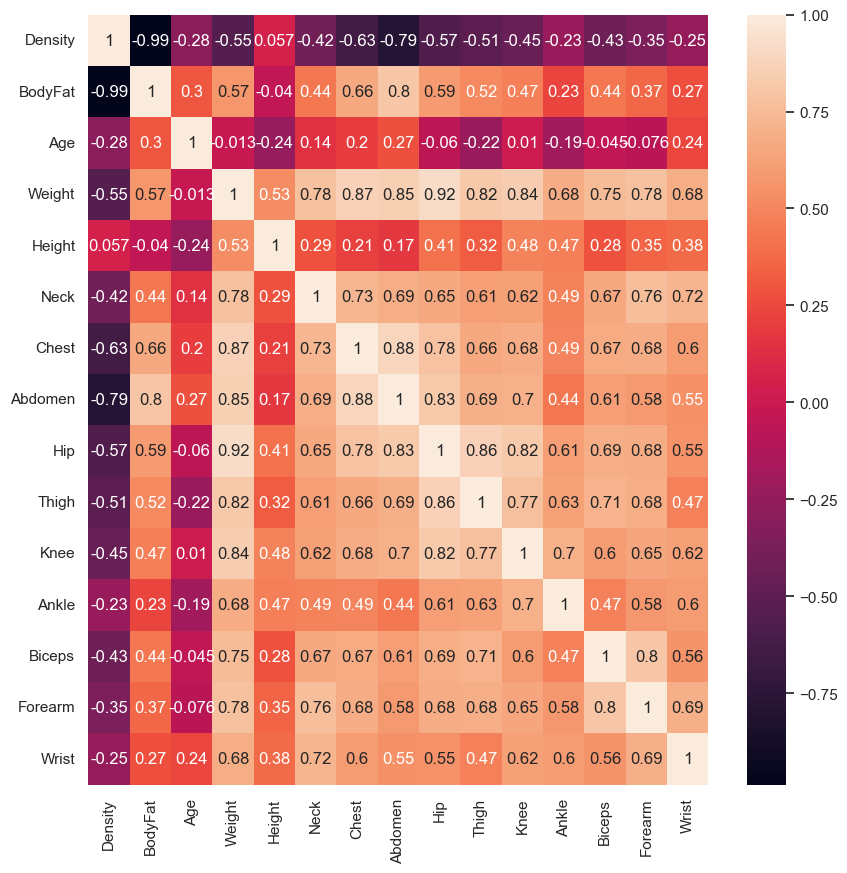

In [22]:
plt.subplots(figsize=(10, 10))

# plotting the heatmap 
hm = sns.heatmap(data=corr_matrix, annot=True) 
  
# displaying the plotted heatmap 
plt.show() 

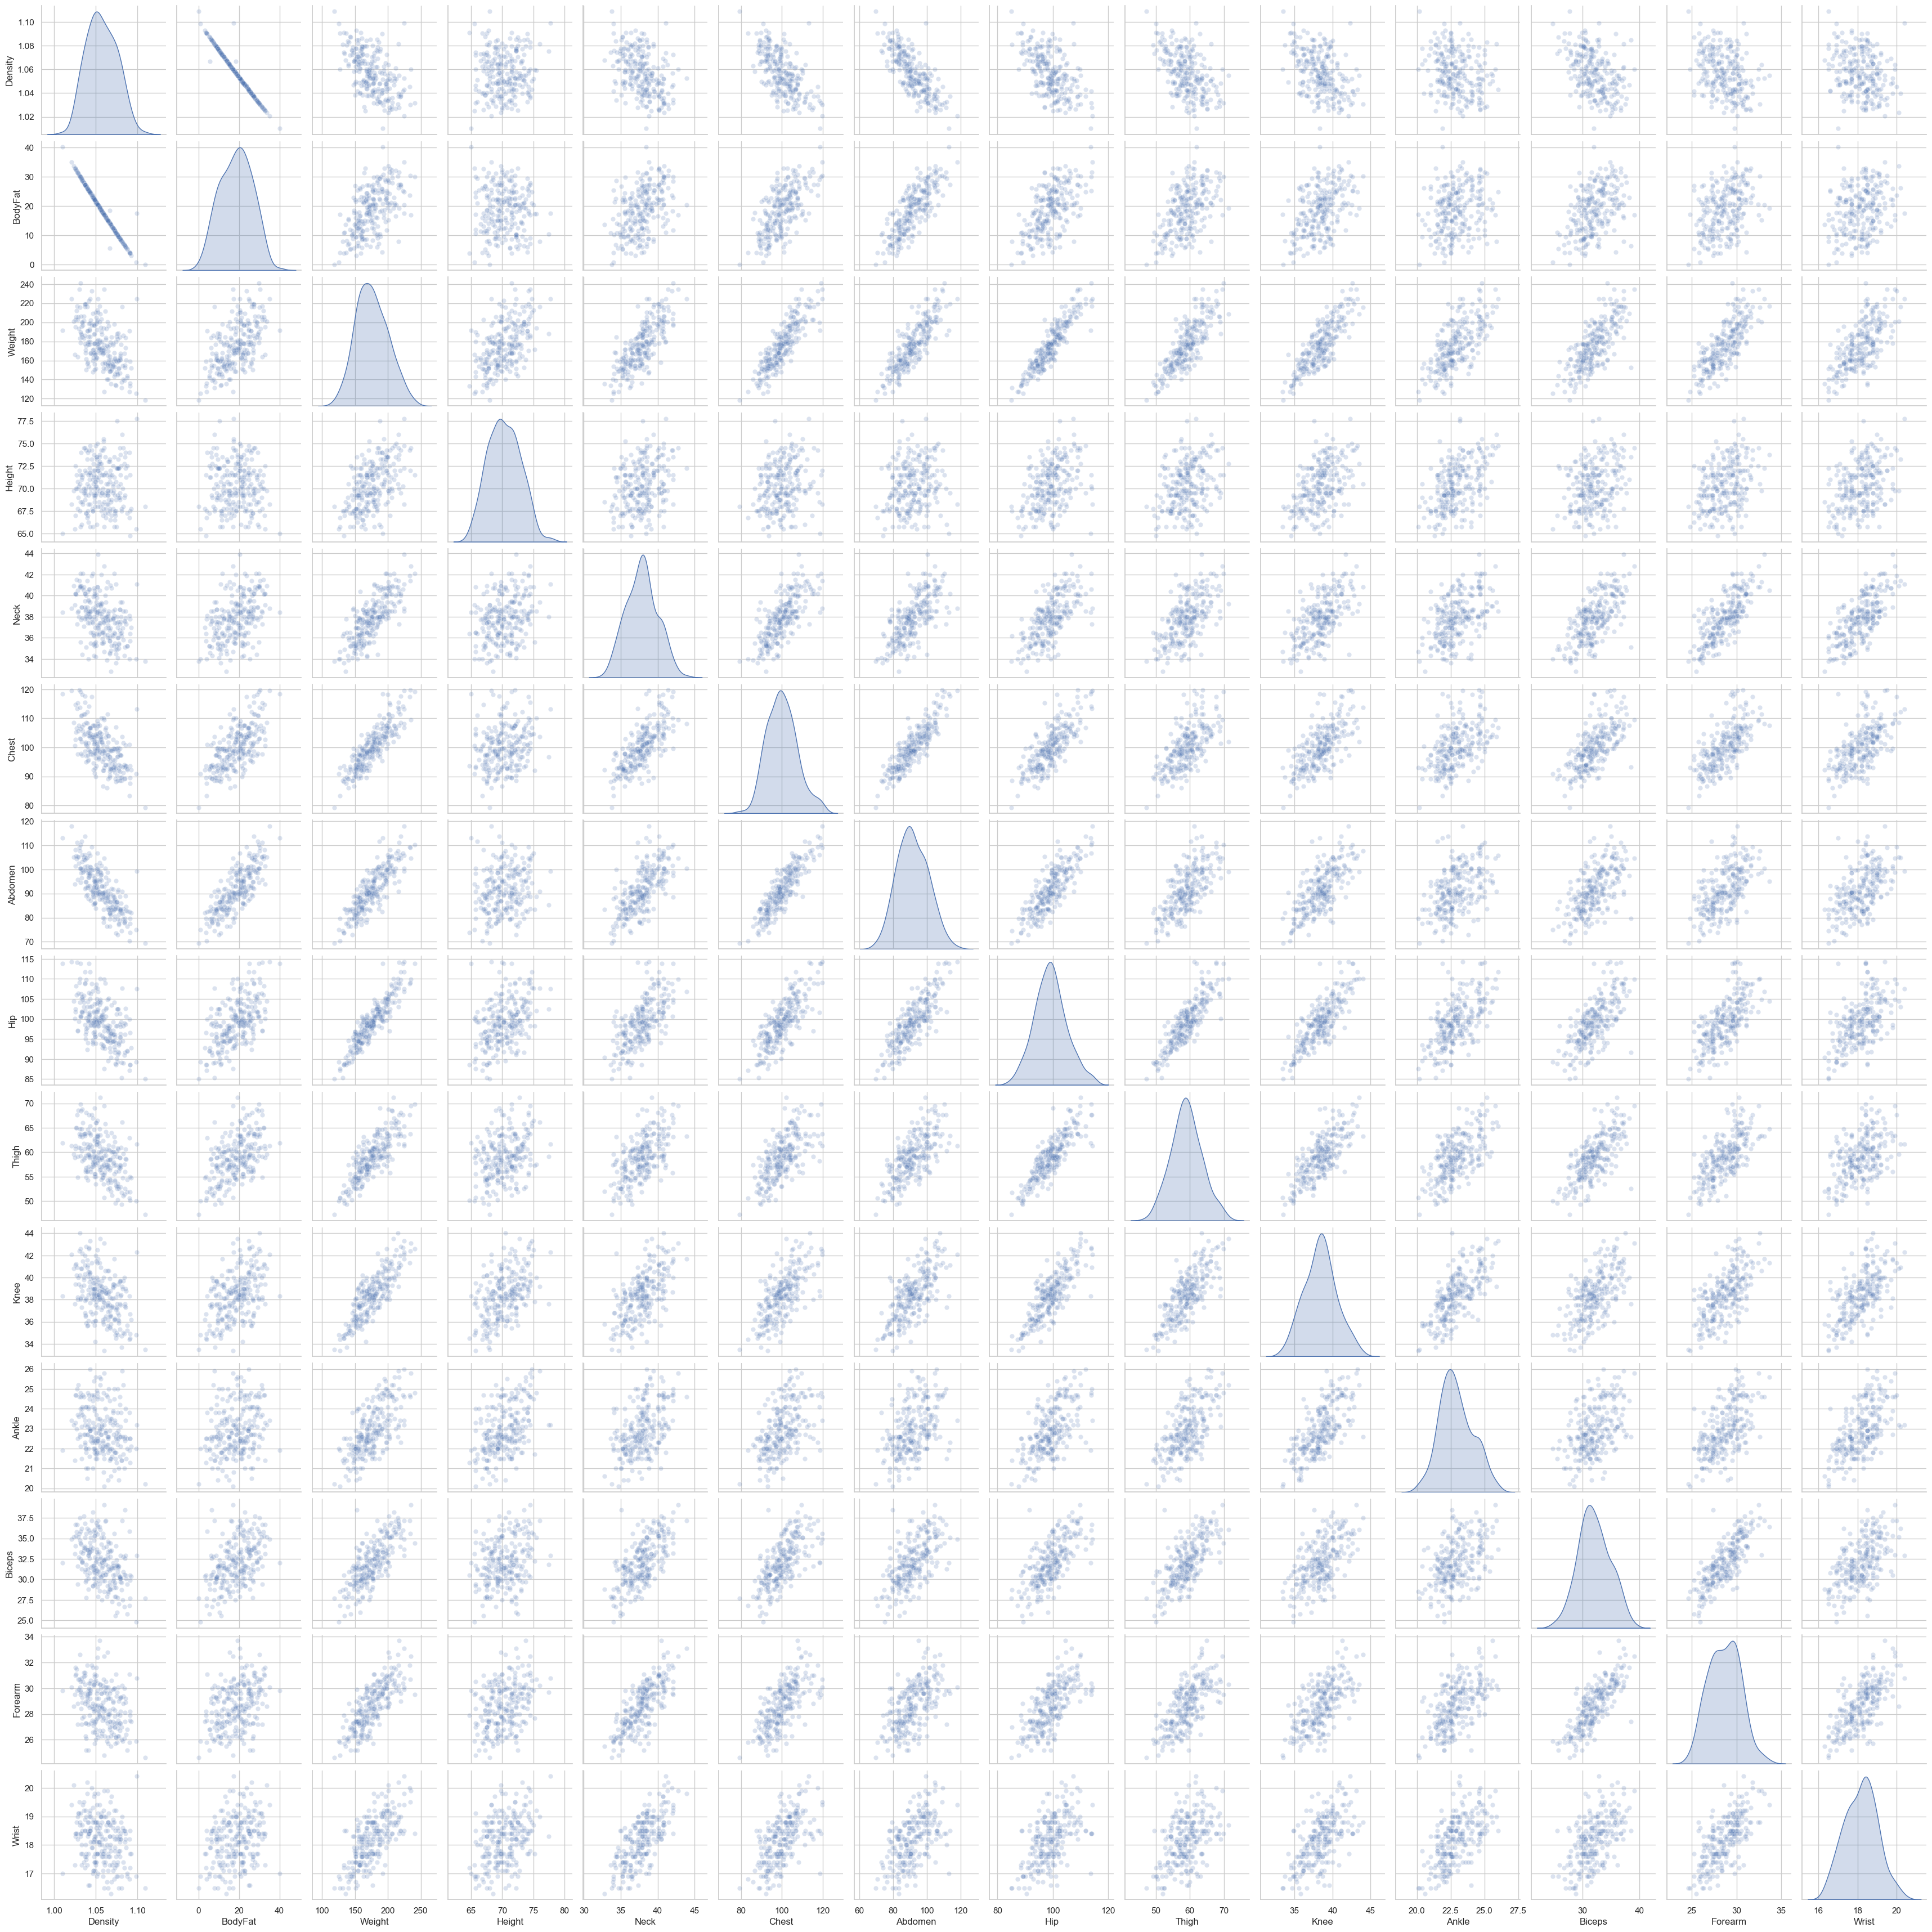

In [23]:
sns.pairplot(data[num_cols], diag_kind='kde', plot_kws={'alpha':0.2})
plt.show()

# Model

In [15]:
x_data = data.drop(["BodyFat"], axis=1)
y_data = data["BodyFat"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state=42)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [16]:
model = sm.OLS(y_train, x_train).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BodyFat   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1313.
Date:                Thu, 09 May 2024   Prob (F-statistic):          8.54e-155
Time:                        01:12:56   Log-Likelihood:                -190.66
No. Observations:                 172   AIC:                             411.3
Df Residuals:                     157   BIC:                             458.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        481.4907      8.750     55.024      0.000     464.207     498.775
Density     -436.2457      6.528    -66.828      0.000    -449.140    -423.352
Age            0.0103      0.007      1.455      0.148      -0.004       0.024
Weight         0.0052      0.015      0.351      0.726      -0.024       0.034
Height        -0.0523      0.042     -1.246      0.215      -0.135       0.031
Neck           0.0395      0.056      0.703      0.483      -0.071       0.151
Chest          0.0009      0.024      0.038      0.970      -0.046       0.048
Abdomen       -0.0068      0.025     -0.274      0.784      -0.056       0.042
Hip            0.0303      0.032      0.952      0.343      -0.033       0.093
Thigh          0.0064      0.033      0.191      0.848      -0.059       0.072
Knee          -0.0637      0.062     -1.023      0.308      -0.187       0.059
Ankle          0.0457      0.083      0.548      0.585      -0.119       0.211
Biceps        -0.0088      0.040     -0.221      0.825      -0.087       0.070
Forearm        0.0067      0.077      0.086      0.931      -0.146       0.159
Wrist         -0.1381      0.138     -0.999      0.319      -0.411       0.135
==============================================================================
Omnibus:                      276.777   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65331.853
Skew:                          -6.966   Prob(JB):                         0.00
Kurtosis:                      97.456   Cond. No.                     4.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred=model.predict(x_test)
MSE_all_model=mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
print("MSE pred=",MSE_all_model)
print("R2 pred: ",R2)
n= len(y_test)
p = len(x_test.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))
print("adj R2 pred: ",adj_R2)


MSE pred= 5.734595814976542
R2 pred:  0.8985083731173122
adj R2 pred:  0.8622613635163523


In [19]:
from aquarel import load_theme

theme = load_theme("arctic_light")

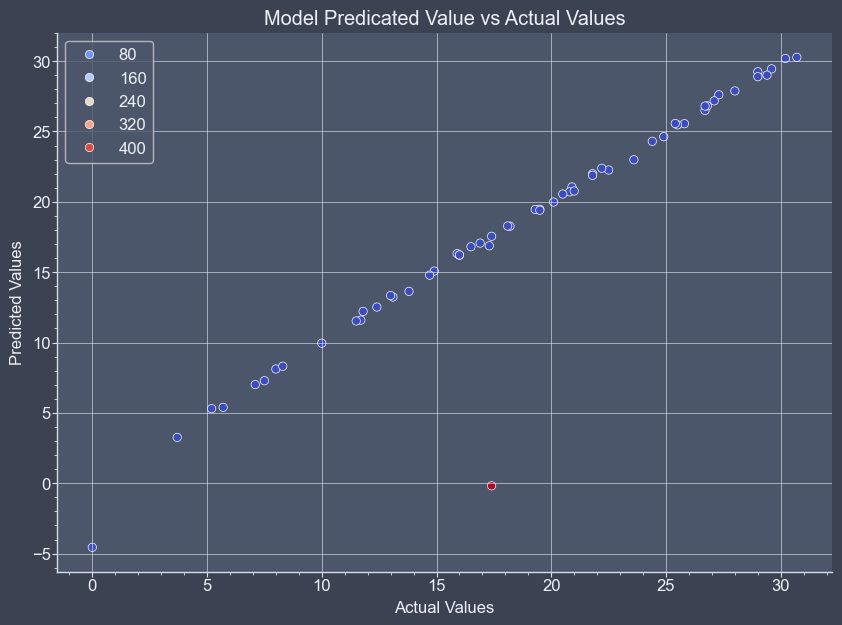

In [20]:
from aquarel import load_theme

with load_theme("arctic_dark"):

    fig, ax =plt.subplots(figsize=(10, 7))
    sns.scatterplot(ax=ax,x=y_test,y=y_pred,hue=[math.sqrt(2**x) for x in (y_test-y_pred)], palette=sns.color_palette("coolwarm", as_cmap=True))
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title("Model Predicated Value vs Actual Values")
    plt.show()

## Trying to remove features:
### We will try to use Lasso regression in order to use its inherit feature selection where the L1 penalty encourages sparsity by shrinking some coefficients to  zero. 

### $$L_{lasso}(\hat{\beta})=\sum\limits^{n}_{i=1}(y_{i} - x_{i}^{T} \hat{\beta})^{2} + \lambda \sum\limits^{m}_{j=1} |\hat{\beta_{j}}|$$

In [21]:
from sklearn.linear_model import Lasso


model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)
n= len(y_test)
p = len(x_test.columns)

R2_training_lasso = r2_score(y_train, pred_train_lasso)
adj_R2_train_lasso = 1- ((1-R2_training_lasso) * (n-1)/(n-p-1))

print("MSE train: ",mean_squared_error(y_train,pred_train_lasso))
print("R2 train: ",R2_training_lasso)
print("adj R2 train: ",adj_R2_train_lasso)

pred_test_lasso= model_lasso.predict(x_test)
R2_test_lasso=r2_score(y_test, pred_test_lasso)
adj_R2_test_lasso = 1- ((1-R2_test_lasso) * (n-1)/(n-p-1))

print("MSE pred: ",mean_squared_error(y_test,pred_test_lasso)) 
print("R2 pred: ",R2_test_lasso)
print("adj R2 pred: ",adj_R2_test_lasso)

MSE train:  1.7545372498015572
R2 train:  0.9723575220072397
adj R2 train:  0.9624852084383967
MSE pred:  4.992748276645022
R2 pred:  0.9116376878926538
adj R2 pred:  0.8800797192828872


Linear Model: \
MSE pred= 5.734595814982774\
R2 pred:  0.8985083731172019\
adj R2 pred:  0.8622613635162025

### its clear that the lasso regression does a lot better in terms of predicted MSE, R2, and adjusted R2

In [22]:
coefficients=model_lasso.coef_
model_lasso.feature_names_in_

array(['const', 'Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'], dtype=object)

In [23]:
coefficients=model_lasso.coef_
for feature, coef in zip(model_lasso.feature_names_in_, coefficients):
    print(f"{feature}: {coef:.4f}")

const: 0.0000
Density: -313.2486
Age: 0.0301
Weight: 0.0018
Height: -0.1162
Neck: -0.0778
Chest: -0.0435
Abdomen: 0.2455
Hip: -0.0025
Thigh: 0.0735
Knee: -0.1179
Ankle: 0.0540
Biceps: 0.0214
Forearm: 0.1145
Wrist: -0.6318


- Density: A decrease in density is associated with an increase in the bodyfat (negative coefficient).
- Age: As age increases, the bodyfat also increases (positive coefficient).
- Weight: A higher weight leads to a higher bodyfat (positive coefficient).
- Height: Taller individuals tend to have a lower bodyfat (negative coefficient).
- Neck: A smaller neck circumference is associated with a higher bodyfat (negative coefficient).
- Chest: Smaller chest size corresponds to a higher bodyfat (negative coefficient).
- Abdomen: Larger abdomen size leads to a higher bodyfat (positive coefficient).
- Hip: Hip size has minimal impact (near-zero coefficient).
- Thigh: Larger thigh circumference corresponds to a higher bodyfat (positive coefficient).
- Knee: Smaller knee circumference is associated with a higher bodyfat (negative coefficient).
- Ankle: Ankle size has minimal impact (near-zero coefficient).
- Biceps: Bigger biceps lead to a higher bodyfat (positive coefficient).
- Forearm: Larger forearm size corresponds to a higher bodyfat (positive coefficient).
- Wrist: Smaller wrist circumference is associated with a higher tbodyfat (negative coefficient).

In [24]:
lasso_coef_df=pd.DataFrame(data={"Feature": model_lasso.feature_names_in_.tolist(), 
                                "Coefficient": coefficients.tolist()})
lasso_coef_df = lasso_coef_df.iloc[2:]
lasso_coef_df.head()

Feature  Coefficient
2     Age     0.030113
3  Weight     0.001797
4  Height    -0.116156
5    Neck    -0.077830
6   Chest    -0.043520

Denisty is very high, even a log scale wouldnt be enough to interpret the data, thus we will drop it and explore the other features

<Figure size 640x480 with 0 Axes>

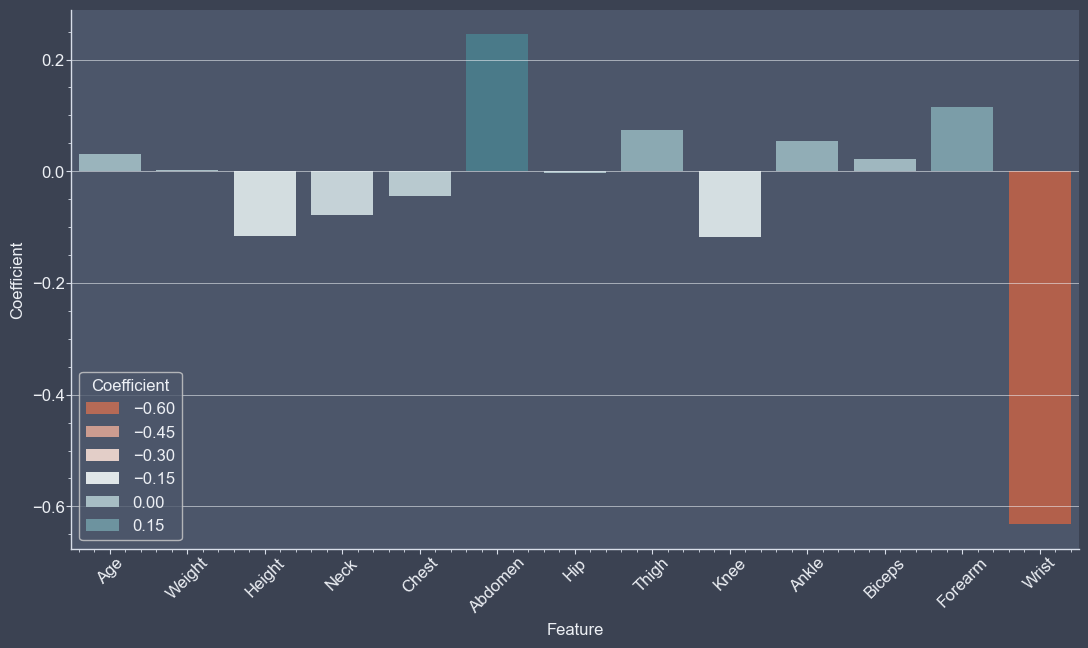

In [25]:
with load_theme("arctic_dark"):
    fig, ax =plt.subplots(figsize=(13, 7))
    fig=sns.barplot(ax=ax,data=lasso_coef_df, x="Feature", y = "Coefficient", hue="Coefficient", palette=sns.diverging_palette(20, 220, as_cmap=True))
    plt.xticks(rotation=45)
    plt.show()

### After the lasso model applied feature selection, **two** features do stand out as the lowest: 
- Weight: 0.0018
- Hip: -0.0025 \
These values are too close to 0, and thus will be removed from the model

<Figure size 640x480 with 0 Axes>

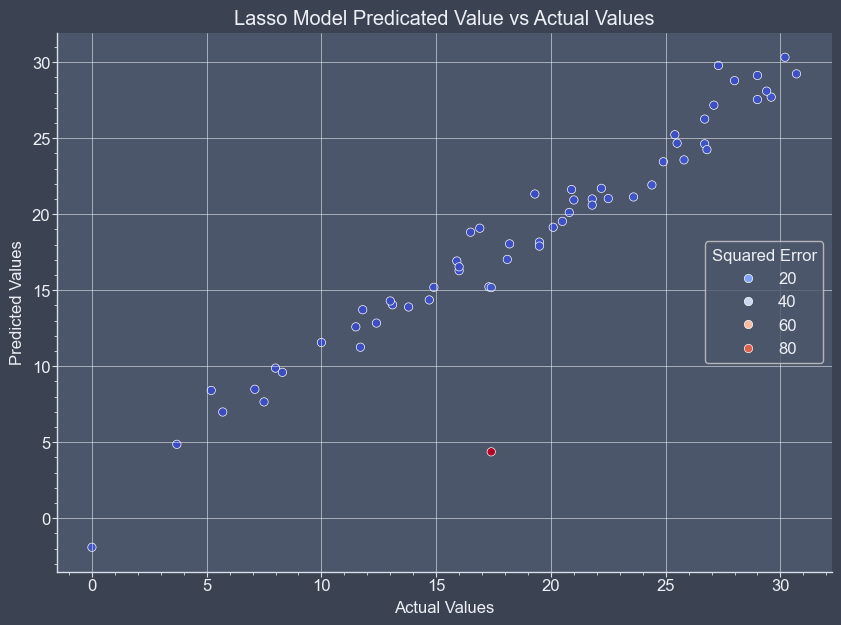

In [26]:
import math 
with load_theme("arctic_dark"):
    fig, ax =plt.subplots(figsize=(10, 7))
    sns.scatterplot(ax=ax,x=y_test,y=pred_test_lasso, hue=[math.sqrt(2**x) for x in (y_test-pred_test_lasso)], palette=sns.color_palette("coolwarm", as_cmap=True)
)
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    #ax.legend(False)
    ax.set_title("Lasso Model Predicated Value vs Actual Values")
    sns.move_legend(ax, "center right")
    plt.legend(title="Squared Error",loc="right")
    plt.show()

In [27]:
x_data = data.drop(["BodyFat", "Weight", "Hip"], axis=1)
y_data = data["BodyFat"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state=42)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [28]:
model_reduced = sm.OLS(y_train, x_train).fit()
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BodyFat   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1537.
Date:                Thu, 09 May 2024   Prob (F-statistic):          1.15e-157
Time:                        01:13:18   Log-Likelihood:                -191.45
No. Observations:                 172   AIC:                             408.9
Df Residuals:                     159   BIC:                             449.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        479.5756      7.278     65.893      0.000     465.201     493.950
Density     -435.7067      6.501    -67.025      0.000    -448.545    -422.868
Age            0.0091      0.007      1.308      0.193      -0.005       0.023
Height        -0.0323      0.029     -1.113      0.267      -0.090       0.025
Neck           0.0345      0.054      0.644      0.521      -0.071       0.140
Chest          0.0081      0.020      0.413      0.680      -0.031       0.047
Abdomen        0.0058      0.022      0.265      0.791      -0.038       0.049
Thigh          0.0261      0.029      0.903      0.368      -0.031       0.083
Knee          -0.0491      0.061     -0.807      0.421      -0.169       0.071
Ankle          0.0534      0.081      0.661      0.509      -0.106       0.213
Biceps        -0.0063      0.039     -0.161      0.872      -0.084       0.071
Forearm        0.0154      0.077      0.201      0.841      -0.136       0.167
Wrist         -0.1388      0.138     -1.008      0.315      -0.411       0.133
==============================================================================
Omnibus:                      272.513   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63254.298
Skew:                          -6.756   Prob(JB):                         0.00
Kurtosis:                      95.971   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
y_pred_2=model_reduced.predict(x_test)
MSE_all_model2=mean_squared_error(y_test, y_pred_2)
R2=r2_score(y_test, y_pred_2)
print("MSE predicted=",MSE_all_model2)
print("R2 pred: ",R2)
n= len(y_test)
p = len(x_test.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))
print("adj R2 pred: ",adj_R2)

MSE predicted= 5.756878777416979
R2 pred:  0.8981140063331808
adj R2 pred:  0.8680113263861661


old model: \
MSE= 5.734595814982774\
R2 pred:  0.8985083731172019\
adj R2 pred:  0.8622613635162025

### The new model does have a slightly worse MSE predicted and very slighty worse R2. But since we also removed some columns, the new model adjusted R2 is slightly better

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

model_lasso2 = Lasso(alpha=0.01)
model_lasso2.fit(x_train, y_train) 
pred_train_lasso= model_lasso2.predict(x_train)
print("MSE train: ",mean_squared_error(y_train,pred_train_lasso))
print("R2 train: ",r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso2.predict(x_test)
R2=r2_score(y_test, pred_test_lasso)

print("MSE pred: ",mean_squared_error(y_test,pred_test_lasso)) 
print("R2 pred: ",R2)
n= len(y_test)
p = len(x_test.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))
print("adj R2 pred: ",adj_R2)

MSE train:  1.7544633475467546
R2 train:  0.9723586863264653
MSE pred:  4.995516235954816
R2 pred:  0.9115887001867089
adj R2 pred:  0.8854671797873275


Old Lasso model: \
MSE train:  1.7545372498015572 \
R2 train:  0.9723575220072397 \
MSE pred:  4.992748276645022 \
R2 pred:  0.9116376878926538 \
adj R2 pred:  0.8800797192828872

### Again we run into the same problem, the MSE for the predicted y in the newer lasso model is slightly worse, the R2 pred is very slightly worse, and the adj R2 -again- is very slightly better 

## Conclusion: We should not remove ANY features
### The best model we came up with is Lasso Regression on all of the features with a penalty of $\lambda =0.01$, scoring:
#### MSE On Trained Data :  1.7545372498015572
#### $R^2$ On Trained Data:  0.9723575220072397
#### Adjusted $R^2$ On Trained Data:  0.9624852084383967
#

#### MSE On Predicted Data:  4.992748276645022
#### $R^2$ On Predicted Data:  0.9116376878926538
#### Adjusted $R^2$ On Predicted Data:  0.8800797192828872

## While the lasso model scores a slightly lower $R^2$ on the trained data in relation to the No regularization model, It preforms better on the testing data. Thus, we chose to add a very slight bias (penalty $\lambda$= 0.01) in order to minimize the variance and to avoid overfitting

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
x_data = data.drop(["BodyFat"], axis=1)
y_data = data["BodyFat"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state=42)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)
n= len(y_test)
p = len(x_test.columns)

R2_training_lasso = r2_score(y_train, pred_train_lasso)
adj_R2_train_lasso = 1- ((1-R2_training_lasso) * (n-1)/(n-p-1))

print("MSE train: ",mean_squared_error(y_train,pred_train_lasso))
print("R2 train: ",R2_training_lasso)
print("adj R2 train: ",adj_R2_train_lasso)

pred_test_lasso= model_lasso.predict(x_test)
R2_test_lasso=r2_score(y_test, pred_test_lasso)
adj_R2_test_lasso = 1- ((1-R2_test_lasso) * (n-1)/(n-p-1))

print("MSE pred: ",mean_squared_error(y_test,pred_test_lasso)) 
print("R2 pred: ",R2_test_lasso)
print("adj R2 pred: ",adj_R2_test_lasso)

MSE train:  1.7545372498015572
R2 train:  0.9723575220072397
adj R2 train:  0.9624852084383967
MSE pred:  4.992748276645022
R2 pred:  0.9116376878926538
adj R2 pred:  0.8800797192828872


In [32]:
residuals=(y_train-model_lasso.predict(x_train))

<Figure size 640x480 with 0 Axes>

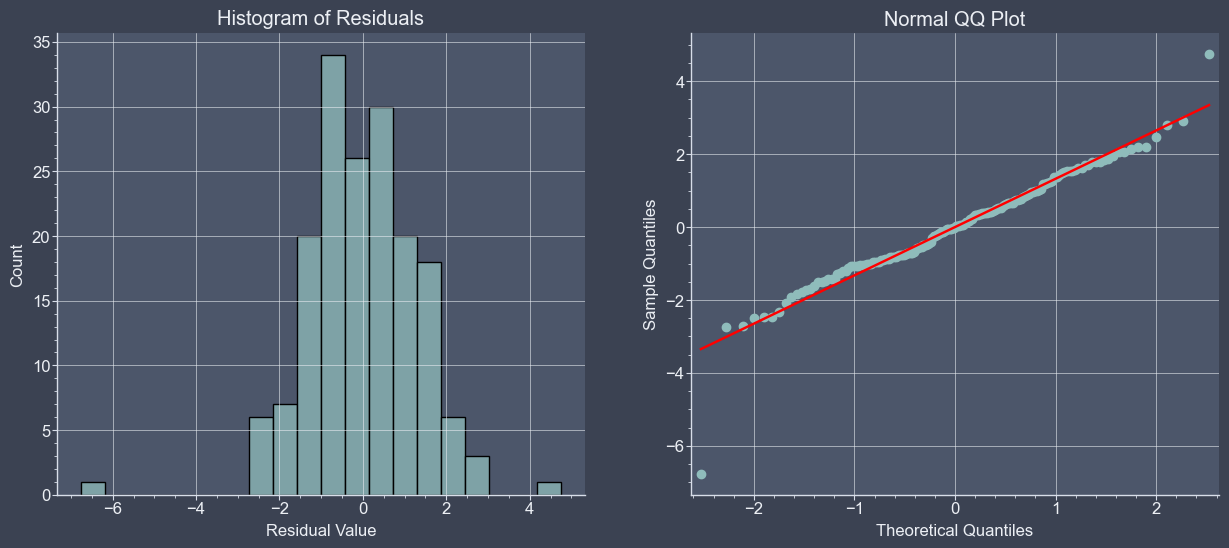

In [33]:
with load_theme("arctic_dark"):
    fig, axes = plt.subplots(1, 2, figsize = (15,6))
    sns.histplot(residuals, ax=axes[0])
    axes[0].set_xlabel("Residual Value")
    axes[0].set_title("Histogram of Residuals")
    sm.qqplot(residuals, line='s',ax = axes[1])
    axes[1].set_title("Normal QQ Plot")
    plt.show()

In [50]:
from scipy.stats import normaltest
_, p_value = normaltest(residuals)
print(p_value)
if p_value < 0.05:
    print("Residuals are not normally distributed.")
else:
    print("Residuals are normally distributed.")

2.8656560205997765e-06
Residuals are not normally distributed.


#### The residuals of the model are not theoriticaly normally distributed according to  D’Agostino and Pearson’s  normality test
#### Yet, according to the qq-plot, the model distribution fairly resembles a normal distribution.
### The formal normality tests always reject on the huge sample sizes  It's even easy to prove that when n gets large, even the smallest deviation from perfect normality will lead to a significant result. And as every dataset has some degree of randomness, no single dataset will be a perfectly normally distributed sample. But in **applied** statistics the question is not whether the data/residuals ... are perfectly normal, but normal enough for the assumptions to hold. <a href="https://stats.stackexchange.com/questions/99621/should-the-shapiro-wilk-test-and-qq-plot-always-be-combined/99622#99622" target="_blank">Sources</a>

### In a thoeritcal sitiuation we would reject the assumption, but in practice the assumption holds and one would follow the qq-plot
# Thus, The residuals **are** **normally** **distributed** and the assumption holds.


## Checking Homoscedasticity: The variance of the errors is constant or similar across the model

<Figure size 640x480 with 0 Axes>

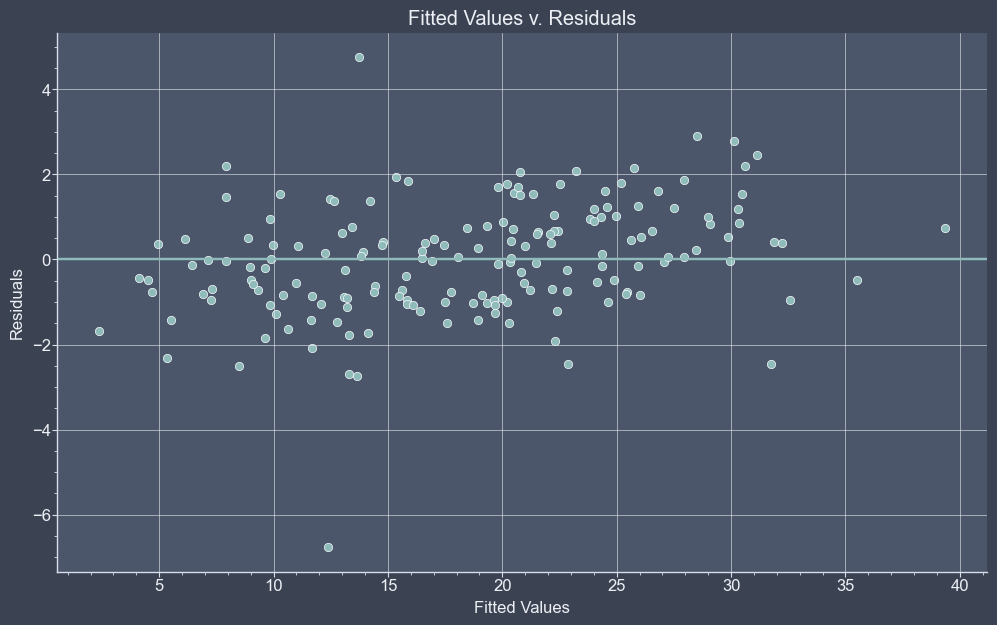

In [34]:
with load_theme("arctic_dark"):
    fig, ax =plt.subplots(figsize=(12, 7))
    fig = sns.scatterplot(x = model_lasso.predict(x_train), y = residuals)
    fig.set_xlabel("Fitted Values")
    fig.set_ylabel("Residuals")
    fig.set_title("Fitted Values v. Residuals")
    fig.axhline(0)
    plt.show()

### We can see that the scatterplots does not follow any pattern and is a random cloud of noise ,thus; the Homoscedasticity Assumption is met
### We can also check the independent residuals assumptions, and again since its more of a random cloud, we can say that the "independent residuals" assumption is met

# But Since the project needs a normal multiple linear regression, we will use the normal multiple linear regression on all the feautres

In [35]:
x_data = data.drop(["BodyFat"], axis=1)
y_data = data["BodyFat"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state=42)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

all_feature_model = sm.OLS(y_train, x_train).fit()

pred_train_lin_model= all_feature_model.predict(x_train)
n= len(y_test)
p = len(x_test.columns)

R2_training_lin_model = r2_score(y_train, pred_train_lin_model)
adj_R2_train_lin_model = 1- ((1-R2_training_lin_model) * (n-1)/(n-p-1))
pred_test_lin_model= all_feature_model.predict(x_test)
R2_test_lin_model=r2_score(y_test, pred_test_lin_model)
adj_R2_test_lin_model = 1- ((1-R2_test_lin_model) * (n-1)/(n-p-1))
print("MSE train: ",mean_squared_error(y_train,pred_train_lin_model))
print("R2 train: ",R2_training_lin_model)
print("adj R2 train: ",adj_R2_train_lin_model)
print("MSE pred: ",mean_squared_error(y_test,pred_test_lin_model)) 
print("R2 pred: ",R2_test_lin_model)
print("adj R2 pred: ",adj_R2_test_lin_model)

MSE train:  0.5374483544322507
R2 train:  0.9915325797093684
adj R2 train:  0.9885085010341428
MSE pred:  5.734595814976542
R2 pred:  0.8985083731173122
adj R2 pred:  0.8622613635163523


# F Test:

## $$H_0 = \text{There is no significant linear relationship}$$
## $$H_1 \ne \text{There is a significant linear relationship}$$
### $$\alpha =0.05$$

In [36]:
A = np.identity(len(all_feature_model.params))
# A is just parameter x parameter identity matrix, we then remove the first row to remove the inntercept
A = A[1:,:]
print(all_feature_model.f_test(A))

<F test: F=1313.189762906423, p=8.542202038146383e-155, df_denom=157, df_num=14>


### p=8.542202038156472e-155 is much lower than our $\alpha = 0.05$
### Reject the null hypothesis: There is a significant linear relationship

In [37]:
all_feature_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BodyFat   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1313.
Date:                Thu, 09 May 2024   Prob (F-statistic):          8.54e-155
Time:                        01:14:24   Log-Likelihood:                -190.66
No. Observations:                 172   AIC:                             411.3
Df Residuals:                     157   BIC:                             458.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        481.4907      8.750     55.024      0.000     464.207     498.775
Density     -436.2457      6.528    -66.828      0.000    -449.140    -423.352
Age            0.0103      0.007      1.455      0.148      -0.004       0.024
Weight         0.0052      0.015      0.351      0.726      -0.024       0.034
Height        -0.0523      0.042     -1.246      0.215      -0.135       0.031
Neck           0.0395      0.056      0.703      0.483      -0.071       0.151
Chest          0.0009      0.024      0.038      0.970      -0.046       0.048
Abdomen       -0.0068      0.025     -0.274      0.784      -0.056       0.042
Hip            0.0303      0.032      0.952      0.343      -0.033       0.093
Thigh          0.0064      0.033      0.191      0.848      -0.059       0.072
Knee          -0.0637      0.062     -1.023      0.308      -0.187       0.059
Ankle          0.0457      0.083      0.548      0.585      -0.119       0.211
Biceps        -0.0088      0.040     -0.221      0.825      -0.087       0.070
Forearm        0.0067      0.077      0.086      0.931      -0.146       0.159
Wrist         -0.1381      0.138     -0.999      0.319      -0.411       0.135
==============================================================================
Omnibus:                      276.777   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65331.853
Skew:                          -6.966   Prob(JB):                         0.00
Kurtosis:                      97.456   Cond. No.                     4.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# T-Test:

In [38]:
p_values = all_feature_model.pvalues[1:]  
p_values

Density    3.108882e-117
Age         1.477868e-01
Weight      7.259117e-01
Height      2.145421e-01
Neck        4.828850e-01
Chest       9.698067e-01
Abdomen     7.841234e-01
Hip         3.427593e-01
Thigh       8.484730e-01
Knee        3.079741e-01
Ankle       5.847957e-01
Biceps      8.253221e-01
Forearm     9.312844e-01
Wrist       3.192628e-01
dtype: float64

In [39]:
p_df=pd.DataFrame(p_values)
p_df.reset_index(inplace=True)

In [40]:
p_df.columns = ["Feature", "p_value"]
p_df.head()

Feature        p_value
0  Density  3.108882e-117
1      Age   1.477868e-01
2   Weight   7.259117e-01
3   Height   2.145421e-01
4     Neck   4.828850e-01

In [41]:
significant_features = p_df[p_df["p_value"] < 0.05]
insignificant_features = p_df[p_df["p_value"] > 0.05]

print("Significant features:")
print(significant_features)

print("\nInsignificant features:")
print(insignificant_features)

Significant features:
   Feature        p_value
0  Density  3.108882e-117

Insignificant features:
    Feature   p_value
1       Age  0.147787
2    Weight  0.725912
3    Height  0.214542
4      Neck  0.482885
5     Chest  0.969807
6   Abdomen  0.784123
7       Hip  0.342759
8     Thigh  0.848473
9      Knee  0.307974
10    Ankle  0.584796
11   Biceps  0.825322
12  Forearm  0.931284
13    Wrist  0.319263


## Does this mean that we should only use density? Not particularly. While all other p_values are rather large, in practice (as we have explored before) these values were beneficial. When we tried to remove just 2 values from the model, we had a slightly worse model in terms of trained metrics and predicted metrics

## Checking Model Residuals Normality

In [42]:
residuals=(y_train-all_feature_model.predict(x_train))

<Figure size 640x480 with 0 Axes>

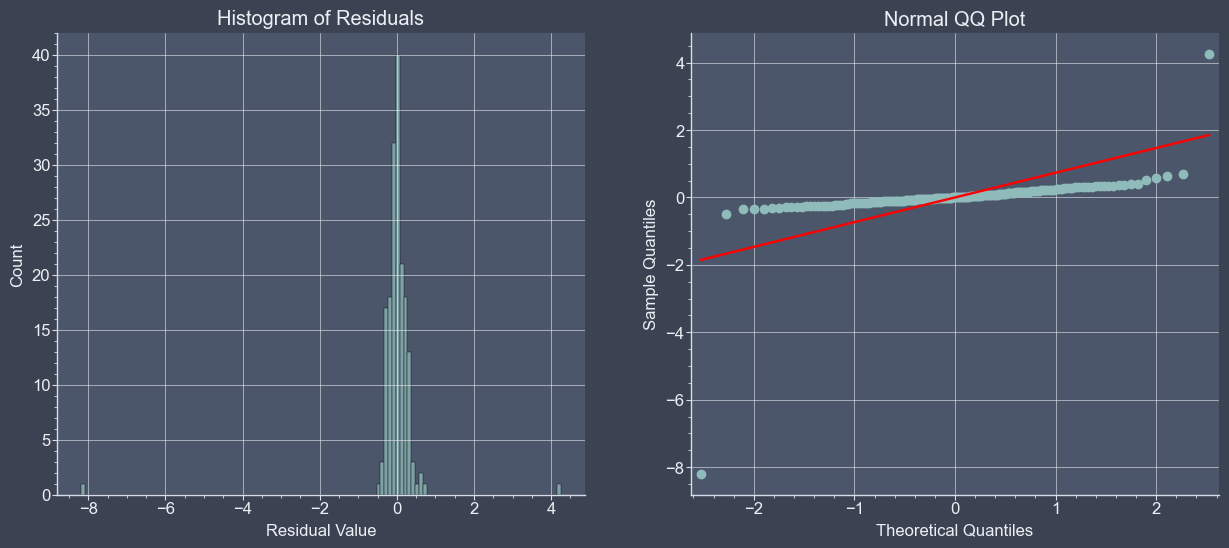

In [43]:
with load_theme("arctic_dark"):
    fig, axes = plt.subplots(1, 2, figsize = (15,6))
    sns.histplot(residuals, ax=axes[0])
    axes[0].set_xlabel("Residual Value")
    axes[0].set_title("Histogram of Residuals")
    sm.qqplot(residuals, line='s',ax = axes[1])
    axes[1].set_title("Normal QQ Plot")
    plt.show()

In [44]:
from scipy.stats import normaltest
_, p_value = normaltest(residuals)
print(p_value)
if p_value < 0.05:
    print("Residuals are not normally distributed.")
else:
    print("Residuals are normally distributed.")

7.918907102902667e-61
Residuals are not normally distributed.


#### The residuals of the model are NOT normally distributed, thus not meeting the normality assumption

## Checking Homoscedasticity: The variance of the errors is constant or similar across the model

<Figure size 640x480 with 0 Axes>

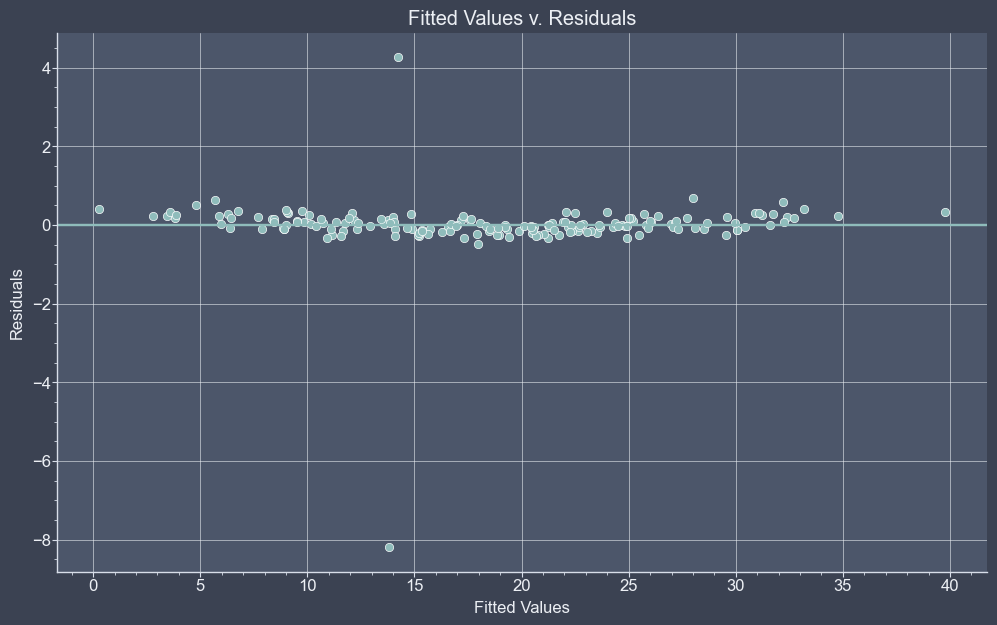

In [45]:
with load_theme("arctic_dark"):
    fig, ax =plt.subplots(figsize=(12, 7))
    fig = sns.scatterplot(x = all_feature_model.predict(x_train), y = residuals)
    fig.set_xlabel("Fitted Values")
    fig.set_ylabel("Residuals")
    fig.set_title("Fitted Values v. Residuals")
    fig.axhline(0)
    plt.show()

### We can see that the scatterplots does not follow any pattern and is a random cloud of noise ,thus; the Homoscedasticity Assumption is met
### We can also check the independent residuals assumptions, and again since its more of a random cloud, we can say that the "independent residuals" assumption is met